In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling 

# importing dataset

In [ ]:
dataset = pd.read_csv('./drive/MyDrive/Proj1_Data.csv')

dataset.info()


NameError: ignored

# Remove unuseful columns


In [ ]:
dataset.drop(columns=['RowNumber','Surname'],inplace=True)
dataset.set_index('CustomerId',inplace=True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Encoding categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_dataset = onehot_encoder.fit_transform(dataset[['Geography','Gender']])

In [ ]:
onehot_df = pd.DataFrame.sparse.from_spmatrix(onehot_dataset)

In [ ]:
onehot_df.set_index(dataset.index,inplace=True)
dataset = dataset.join(onehot_df)


In [ ]:
dataset.drop(columns=['Geography','Gender'],inplace=True)

# Taking care of missing data
since we have no missing data, we go right into feature scaling

## Feature Scaling

In [ ]:
y = dataset['Exited'].copy()
X = dataset.drop(columns=['Exited'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(data=scaler.fit_transform(X.values),index=X.index)
X.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
CustomerId,,,,,,,,,,,,,
15634602,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
15647311,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
15619304,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
15701354,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
15737888,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0


# Spliting data to test and train


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Defining the neural network model







In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical 
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=13))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
sgd = SGD(lr=0.05, momentum=0.6)
model.compile(optimizer=sgd, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
          batch_size=16,
          epochs=200,
          validation_data=(X_test,y_test),
          shuffle=True)

Epoch 1/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.7952 - val_loss: 0.4877 - val_accuracy: 0.7895
Epoch 2/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4841 - accuracy: 0.7980 - val_loss: 0.4721 - val_accuracy: 0.7895
Epoch 3/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.7983 - val_loss: 0.4498 - val_accuracy: 0.7895
Epoch 4/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7966 - val_loss: 0.4379 - val_accuracy: 0.7900
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8066 - val_loss: 0.4214 - val_accuracy: 0.8170
Epoch 6/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.8131 - val_loss: 0.4094 - val_accuracy: 0.8330
Epoch 7/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8215 - val_loss: 0.4138 - val_accuracy: 0.8310

# Plotting model and results

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

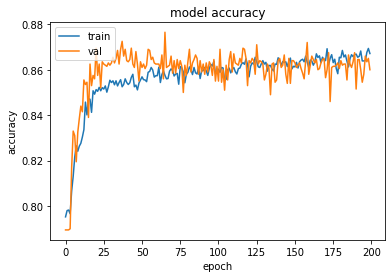

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


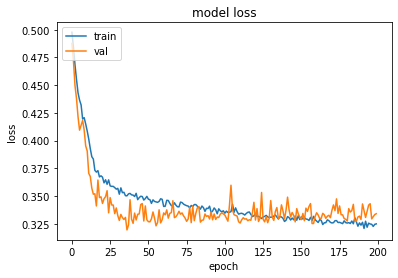

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

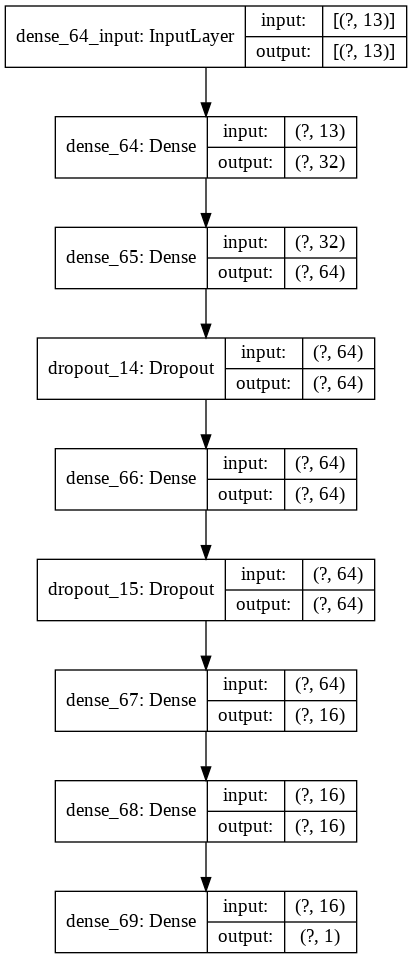

In [ ]:
from keras.utils import plot_model,model_to_dot
plot_model(model, show_shapes=True)


In [ ]:
weights = model.get_weights()
import pickle
try:
  fpkl = open('weightsFile', 'wb')
  pickle.dump(weights, fpkl, protocol=pickle.HIGHEST_PROTOCOL)
  fpkl.close()
except:
  fpkl = open('weightsFile', 'w')
